In [1]:
from xgboost import plot_importance
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./data/pivot.csv')
df

,jobno,CR1_mean,CR1_min,CR1_max,CR1_std,CR1_var,ER1_mean,ER1_min,ER1_max,ER1_std,ER1_var,ST1_mean,ST1_min,ST1_max,ST1_std,ST1_var,ST2_mean,ST2_min,ST2_max,ST2_std,ST2_var,prod_grade
0,1,44.460927,6.0,245.0,15.831372,250.632326,46.216444,1.0,100.0,24.897475,619.884285,70.000000,70.0,70.0,0.000000,0.000000,80.000000,50.0,95.0,25.980762,675.000000,A
1,2,58.524277,28.0,92.0,20.107806,404.323868,49.544407,1.0,100.0,21.936792,481.222822,70.000000,70.0,70.0,0.000000,0.000000,80.000000,50.0,95.0,25.980762,675.000000,A-
2,4,50.807634,25.0,88.0,18.928483,358.287479,42.368451,0.0,100.0,26.104542,681.447092,70.000000,70.0,70.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,B-
3,5,45.077235,24.0,56.0,8.947864,80.064275,45.367722,1.0,100.0,24.812140,615.642274,70.000000,70.0,70.0,0.000000,0.000000,72.500000,50.0,95.0,31.819805,1012.500000,A-
4,6,55.632718,25.0,86.0,17.811346,317.244039,48.017112,1.0,100.0,21.850776,477.456401,70.000000,70.0,70.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
5,7,56.629355,22.0,89.0,18.001569,324.056499,53.650792,1.0,100.0,19.761525,390.517876,47.333333,12.0,70.0,31.005376,961.333333,67.333333,12.0,95.0,47.920072,2296.333333,A
6,8,66.922203,18.0,157.0,24.679293,609.067505,67.104503,50.0,90.0,6.265291,39.253875,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
7,9,55.162954,23.0,95.0,22.202766,492.962824,58.352833,23.0,100.0,15.408615,237.425423,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
8,10,56.908987,21.0,95.0,23.384310,546.825971,57.361921,23.0,100.0,15.624225,244.116404,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
9,11,43.869799,28.0,56.0,11.532931,133.008505,78.838962,72.0,91.0,1.758430,3.092076,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A


In [4]:
y = df['prod_grade']
x = df.drop('prod_grade', axis = 1)

In [5]:
df

,jobno,CR1_mean,CR1_min,CR1_max,CR1_std,CR1_var,ER1_mean,ER1_min,ER1_max,ER1_std,ER1_var,ST1_mean,ST1_min,ST1_max,ST1_std,ST1_var,ST2_mean,ST2_min,ST2_max,ST2_std,ST2_var,prod_grade
0,1,44.460927,6.0,245.0,15.831372,250.632326,46.216444,1.0,100.0,24.897475,619.884285,70.000000,70.0,70.0,0.000000,0.000000,80.000000,50.0,95.0,25.980762,675.000000,A
1,2,58.524277,28.0,92.0,20.107806,404.323868,49.544407,1.0,100.0,21.936792,481.222822,70.000000,70.0,70.0,0.000000,0.000000,80.000000,50.0,95.0,25.980762,675.000000,A-
2,4,50.807634,25.0,88.0,18.928483,358.287479,42.368451,0.0,100.0,26.104542,681.447092,70.000000,70.0,70.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,B-
3,5,45.077235,24.0,56.0,8.947864,80.064275,45.367722,1.0,100.0,24.812140,615.642274,70.000000,70.0,70.0,0.000000,0.000000,72.500000,50.0,95.0,31.819805,1012.500000,A-
4,6,55.632718,25.0,86.0,17.811346,317.244039,48.017112,1.0,100.0,21.850776,477.456401,70.000000,70.0,70.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
5,7,56.629355,22.0,89.0,18.001569,324.056499,53.650792,1.0,100.0,19.761525,390.517876,47.333333,12.0,70.0,31.005376,961.333333,67.333333,12.0,95.0,47.920072,2296.333333,A
6,8,66.922203,18.0,157.0,24.679293,609.067505,67.104503,50.0,90.0,6.265291,39.253875,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
7,9,55.162954,23.0,95.0,22.202766,492.962824,58.352833,23.0,100.0,15.408615,237.425423,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
8,10,56.908987,21.0,95.0,23.384310,546.825971,57.361921,23.0,100.0,15.624225,244.116404,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A
9,11,43.869799,28.0,56.0,11.532931,133.008505,78.838962,72.0,91.0,1.758430,3.092076,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000,A


In [6]:
x.drop(columns=['jobno'], inplace=True)

In [7]:
x

,CR1_mean,CR1_min,CR1_max,CR1_std,CR1_var,ER1_mean,ER1_min,ER1_max,ER1_std,ER1_var,ST1_mean,ST1_min,ST1_max,ST1_std,ST1_var,ST2_mean,ST2_min,ST2_max,ST2_std,ST2_var
0,44.460927,6.0,245.0,15.831372,250.632326,46.216444,1.0,100.0,24.897475,619.884285,70.000000,70.0,70.0,0.000000,0.000000,80.000000,50.0,95.0,25.980762,675.000000
1,58.524277,28.0,92.0,20.107806,404.323868,49.544407,1.0,100.0,21.936792,481.222822,70.000000,70.0,70.0,0.000000,0.000000,80.000000,50.0,95.0,25.980762,675.000000
2,50.807634,25.0,88.0,18.928483,358.287479,42.368451,0.0,100.0,26.104542,681.447092,70.000000,70.0,70.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
3,45.077235,24.0,56.0,8.947864,80.064275,45.367722,1.0,100.0,24.812140,615.642274,70.000000,70.0,70.0,0.000000,0.000000,72.500000,50.0,95.0,31.819805,1012.500000
4,55.632718,25.0,86.0,17.811346,317.244039,48.017112,1.0,100.0,21.850776,477.456401,70.000000,70.0,70.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
5,56.629355,22.0,89.0,18.001569,324.056499,53.650792,1.0,100.0,19.761525,390.517876,47.333333,12.0,70.0,31.005376,961.333333,67.333333,12.0,95.0,47.920072,2296.333333
6,66.922203,18.0,157.0,24.679293,609.067505,67.104503,50.0,90.0,6.265291,39.253875,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
7,55.162954,23.0,95.0,22.202766,492.962824,58.352833,23.0,100.0,15.408615,237.425423,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
8,56.908987,21.0,95.0,23.384310,546.825971,57.361921,23.0,100.0,15.624225,244.116404,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
9,43.869799,28.0,56.0,11.532931,133.008505,78.838962,72.0,91.0,1.758430,3.092076,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
print(x_train.shape, x_test.shape)

(93, 20) (24, 20)


In [9]:
x_train

,CR1_mean,CR1_min,CR1_max,CR1_std,CR1_var,ER1_mean,ER1_min,ER1_max,ER1_std,ER1_var,ST1_mean,ST1_min,ST1_max,ST1_std,ST1_var,ST2_mean,ST2_min,ST2_max,ST2_std,ST2_var
36,39.815078,9.0,174.0,9.828994,96.609127,46.576599,0.0,100.0,22.217910,493.635516,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
22,39.814659,20.0,48.0,9.052103,81.940564,47.724706,0.0,100.0,18.266202,333.654119,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
21,42.095928,18.0,51.0,6.916948,47.844174,51.290983,0.0,100.0,14.516924,210.741072,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
68,62.395601,10.0,85.0,24.536978,602.063298,65.676946,0.0,100.0,20.333594,413.455044,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
49,39.817649,9.0,56.0,9.131830,83.390318,52.323690,0.0,100.0,14.994079,224.822396,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
61,60.466073,9.0,86.0,25.081363,629.074777,72.331140,2.0,94.0,9.319041,86.844525,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
110,60.371174,24.0,184.0,21.618557,467.362003,64.654482,0.0,100.0,13.523970,182.897771,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
28,47.174126,23.0,95.0,17.200927,295.871900,65.517348,0.0,100.0,26.468397,700.576025,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
51,41.343998,5.0,253.0,11.869673,140.889142,56.368435,0.0,100.0,17.264708,298.070139,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000
56,41.572243,24.0,47.0,6.399013,40.947370,54.831639,1.0,60.0,5.810471,33.761578,60.000000,60.0,60.0,0.000000,0.000000,95.000000,95.0,95.0,0.000000,0.000000


In [10]:
y_train

36      A
22      A
21     B-
68      A
49      A
61      A
110     A
28     B-
51      A
56      A
39      A
75      A
20     A-
69      A
62      A
52      A
99      A
11      A
41      A
31      A
89      A
108    B-
100     A
65      A
73      A
78      A
96      A
46      A
47      A
93      A
103     A
18      A
87      A
90      A
38      A
26      A
106     A
116     A
19     B-
77      A
102     A
8       A
3      A-
97      A
59      A
50      A
53      A
5       A
85      A
40      A
86      A
111     A
7       A
14     A-
44      A
83      A
57      A
10     A-
88      A
27     B-
23      A
79      A
64      A
43      A
70      A
67      A
17     B-
105     A
113     A
112     A
84      A
37      A
74      A
1      A-
12      A
34      A
4       A
45      A
32      A
48      A
92      A
24      B
82      A
71      B
33      A
76      A
13      A
55      A
81      A
91      A
80      A
63      A
25      A
Name: prod_grade, dtype: object

In [11]:
x_test

,CR1_mean,CR1_min,CR1_max,CR1_std,CR1_var,ER1_mean,ER1_min,ER1_max,ER1_std,ER1_var,ST1_mean,ST1_min,ST1_max,ST1_std,ST1_var,ST2_mean,ST2_min,ST2_max,ST2_std,ST2_var
104,53.400620,18.0,95.0,22.049146,486.164847,54.016547,0.0,100.0,20.249839,410.055968,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
16,54.125664,19.0,95.0,20.320544,412.924501,48.896323,0.0,100.0,21.252835,451.683003,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
98,49.882847,16.0,96.0,21.727409,472.080287,49.922517,1.0,100.0,19.114163,365.351222,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
35,50.313024,16.0,95.0,25.312969,640.746408,43.082835,0.0,100.0,33.395646,1115.269194,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
0,44.460927,6.0,245.0,15.831372,250.632326,46.216444,1.0,100.0,24.897475,619.884285,70.0,70.0,70.0,0.0,0.0,80.0,50.0,95.0,25.980762,675.0
58,47.033640,24.0,218.0,16.777215,281.474935,60.505189,1.0,100.0,14.711356,216.423992,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
9,43.869799,28.0,56.0,11.532931,133.008505,78.838962,72.0,91.0,1.758430,3.092076,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
2,50.807634,25.0,88.0,18.928483,358.287479,42.368451,0.0,100.0,26.104542,681.447092,70.0,70.0,70.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
42,39.138419,8.0,59.0,10.254158,105.147748,44.355774,0.0,100.0,22.082961,487.657146,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0
54,28.779190,5.0,56.0,17.401620,302.816390,30.820137,0.0,100.0,27.070508,732.812377,60.0,60.0,60.0,0.0,0.0,95.0,95.0,95.0,0.000000,0.0


In [12]:
len(y_test)

24

In [13]:
#학습하기
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
xgb.fit(x_train, y_train)

C:\Users\sohyang\anaconda3\envs\atc\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
#예측하기
xgb_pred = xgb.predict(x_test)

In [15]:
#accuracy 정확도
#from sklearn.metrics import mean_squared_error
accuracy_score(y_test, xgb_pred)
#rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
#print("RMSE : %f" % (rmse))

0.8333333333333334

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

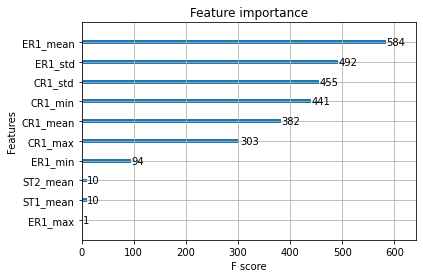

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_importance(xgb, ax = ax)

In [17]:
from sklearn.metrics import classification_report
report = classification_report(y_test, xgb_pred)
print(">> 모델 평가 리포트")
print(report)

>> 모델 평가 리포트
              precision    recall  f1-score   support

           A       0.87      0.95      0.91        21
          A-       0.00      0.00      0.00         1
          B-       0.00      0.00      0.00         2

    accuracy                           0.83        24
   macro avg       0.29      0.32      0.30        24
weighted avg       0.76      0.83      0.80        24



C:\Users\sohyang\anaconda3\envs\atc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


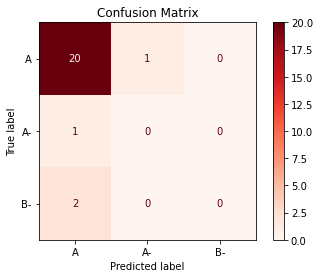

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

labels = ['A', 'A-','B-']
disp = plot_confusion_matrix(xgb, 
                             x_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

In [19]:
y_test

104     A
16     A-
98      A
35      A
0       A
58      A
9       A
2      B-
42      A
54      A
6       A
101     A
30      A
72     B-
107     A
66      A
109     A
115     A
94      A
95      A
29      A
15      A
114     A
60      A
Name: prod_grade, dtype: object

In [20]:
xgb_pred

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A-', 'A', 'A'],
      dtype=object)

# 